<a href="https://colab.research.google.com/github/davydovavd/colab/blob/main/bot_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  <center> 9й семинар :)</center>


<img src="https://evilcoder.ru/wp-content/uploads/2017/09/TelegramMessenger.png" width=100>

Всем привет! Цель – написать своего первого телеграм-бота. Это сильно проще, чем кажется...))

Нам потребуется чуть более удобная IDE, например, PyCharm – скачать можно [здесь](https://www.jetbrains.com/ru-ru/pycharm/), Вам нужна community edition.

Будет писать бота, который хранит списки дел. То есть, для каждого пользователя, который начинает с ним диалог, бот сможет:
* добавлять дело в список;
* удалять дело из списка;
* удалять все дела из списка;
* присылать список дел.

## Получаем токен

Первое, что надо сделать – найти в поисковой строке телеграма `@BotFather`, набрать команду `/start` и создать своего бота. Вас сначала попросят выбрать имя, потом имя пользователя (должно заканчиваться на "bot") и в конце выдадут токен, по которому мы будем подключаться к API телеграма. 

Также в `@BotFather` можно поставить аватарку и описание нашему боту, а также обновить токен, если Вы его случайно кому-то отдали (команда `/revoke`).

## Подключаем бота и пишем первую функцию

* Открываем новый проект в PyCharm
* Работать будем в файле `main.py` – если не пользовались раньше PyCharm, то можете глянуть первую неделю курсеры, которую мы рекомендовали в начале курса :)

Для работы с API телеграма есть специальная библиотека – `telebot`. Вам нужно ее установить. Откройте вкладку терминал в PyCharm и напишите такую строчку:

`pip install pyTelegramBotAPI==3.7.9`

На скрине ниже выделила как открыть терминал:

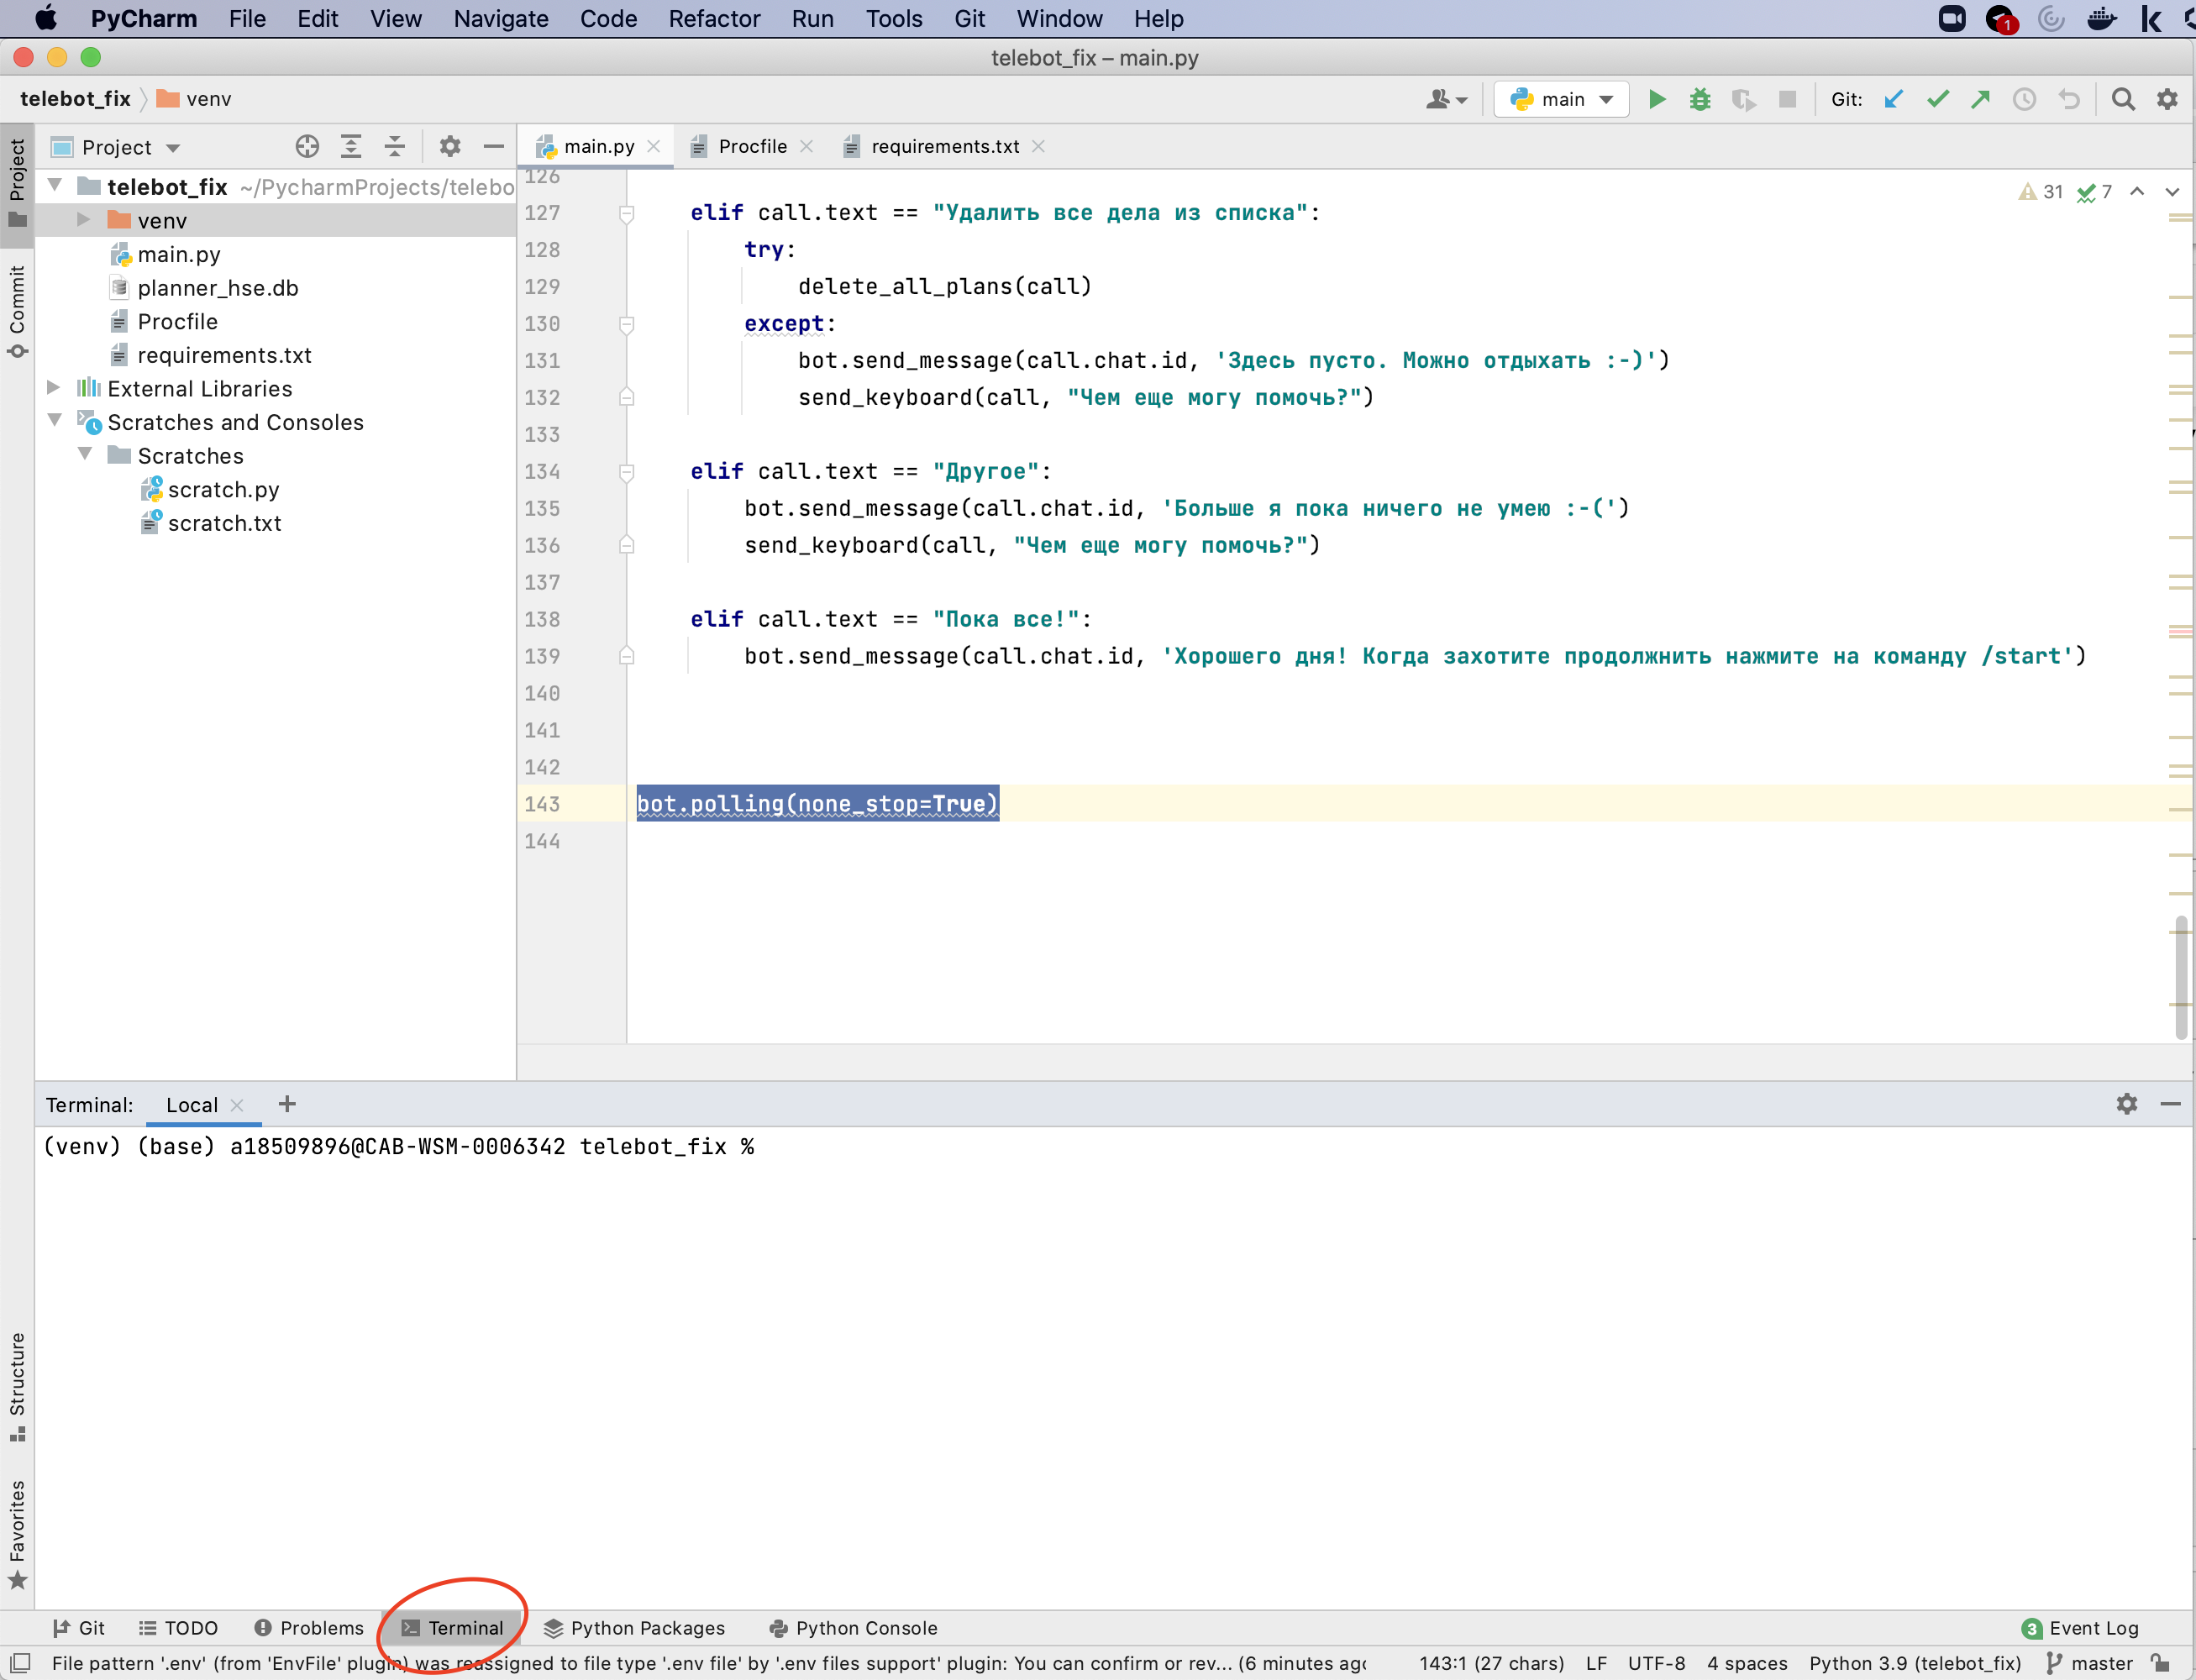

Будьте аккуратны! Не используйте для текущего семинара `pip install telebot`.

Отлично! Теперь мы готовы начинать:

In [ ]:
import telebot
from telebot import types

In [ ]:
# подключим токен нашего бота
bot = telebot.TeleBot("вставьте сюда свой токен")

Вообще токены обычно хранят в отдельном файле с конфигурациями – можете его создать и импортировать токен оттуда.

Следующий наш шаг – написать первую команду!

In [ ]:
# напишем, что делать нашему боту при команде старт
@bot.message_handler(commands=['start'])
def send_keyboard(message, text="Привет, чем я могу тебе помочь?"):
    keyboard = types.ReplyKeyboardMarkup(row_width=2)  # наша клавиатура
    itembtn1 = types.KeyboardButton('Добавить дело в список') # создадим кнопку
    itembtn2 = types.KeyboardButton('Показать список дел')
    itembtn3 = types.KeyboardButton('Удалить дело из списка')
    itembtn4 = types.KeyboardButton("Удалить все дела из списка")
    itembtn5 = types.KeyboardButton('Другое')
    itembtn6 = types.KeyboardButton('Пока все!')
    keyboard.add(itembtn1, itembtn2) # добавим кнопки 1 и 2 на первый ряд
    keyboard.add(itembtn3, itembtn4, itembtn5, itembtn6) # добавим кнопки 3, 4, 5 на второй ряд
    # но если кнопок слишком много, они пойдут на след ряд автоматически

    # пришлем это все сообщением и запишем выбранный вариант
    msg = bot.send_message(message.from_user.id,
                     text=text, reply_markup=keyboard)

    # отправим этот вариант в функцию, которая его обработает
    bot.register_next_step_handler(msg, callback_worker)

Давайте разберемся, что здесь происходит.

`@bot.message_handler(commands=['start'])` обозначает, когда выполнять функцию, которая написана под ней (`send_keyboard`) в нашем случае. Такая конструкция называется декоратор и использует механизм хендлеров. `commands=['start']` значит, что `send_keyboard` будет высылаться при команде `\start`.

Аналогично можно написать `@bot.message_handler(commands=['start', 'help'])`, чтобы функция вызывалась при командах `\start` и `\help`. А `@bot.message_handler(content_types=["text"])` будет вызывать функцию под ней при получении любого текстового сообщения. Можно сделать его более кастомным: `@bot.message_handler(func=lambda message: message.text == "hi")
` будет работать, если сообщение было словом "hi". Можно настроить его для ответов на присланные пользователем файлы, фотографии и аудио – [см. документацию](https://core.telegram.org/bots/api#available-types).


`types.ReplyKeyboardMarkup` – создает нам клавиатуру, а `types.KeyboardButton('Добавить дело в список')` – кнопку. `keyboard.add(itembtn1, itembtn2)` добавляет кнопки на клавиатуру. 

`msg = bot.send_message(message.from_user.id, text=text, reply_markup=keyboard)` присылает пользователю клавиатуру с сообщением "Привет, чем я могу тебе помочь?". `bot.send_message(message.from_user.id,` отвечает за то, чтобы прислать сообщение в нужный чат, `text=text,` задает текст сообщения (я его задала аргументом в функции, тк буду использовать эту функцию дальше в других случаях с другим текстом). `reply_markup=keyboard` прикрепляет клавиатуру к сообщению. Выбор пользователя сохраняем в переменную `msg`.

Если Вы следуете этой инструкции код параллельно с семинаром, то можете запустить код – бот будет присылать клавиатуру (но больше ничего делать не будет, т.к. функцию-обработчик мы еще не написали). Добавьте только в конце строчку `bot.polling(none_stop=True)`, мы чуть позже разберем, что она делает.

`bot.register_next_step_handler(msg, callback_worker)` – отправит выбор пользователя с клавиатуры в функцию `callback_worker`, которую мы позже напишем.

Кстати, вы наверняка видели и другой тип клавиатуры – inline. 

<img src="https://core.telegram.org/file/811140659/1/RRJyulbtLBY/ea6163411c7eb4f4dc" width=300>

Почитать о ней подробнее можно [здесь](https://core.telegram.org/bots/api/#inlinekeyboardmarkup), запускается она практически аналогично.

## Добавляем SQLite

Нам нужно, чтобы для каждого обратившегося к ней пользователя наша система хранила список дел. Я предлагаю воспользоваться базой данных SQLite – она быстрая (т.к. обращается напрямую к файлам, без портов и сокетов), легко встраивается в приложения и проста в использовании. Вы можете попробовать подключить более продвинутые MySQL и PostgreSQL, но это потребует чуть больше времени. 

Можно и просто сохранять все в обычный файлик, но помните, что такой вариант масштабировать не получится – вспомните историю, [как в Великобритании потеряли 16 тысяч положительных тестов на коронавирус.](https://www.kommersant.ru/doc/4520501)

In [ ]:
import sqlite3

Устанавливать ее не нужно – она встроена в питон. Можем сразу начинать работать. Подключим ее:

In [ ]:
# подключаем базу данных
conn = sqlite3.connect('planner_hse.db')

# курсор для работы с таблицами
cursor = conn.cursor()

Если базы данных с таким названием раньше не было, то она создастся, а если есть, то откроется. Теперь давайте проверим, есть ли в ней нужная нам таблица:

In [ ]:
try:
    # sql запрос для создания таблицы
    query = "CREATE TABLE \"planner\" (\"ID\" INTEGER UNIQUE, \"user_id\" INTEGER, \"plan\" TEXT, PRIMARY KEY (\"ID\"))"
    # исполняем его –> ура, теперь у нас есть таблица, куда будем все сохранять!
    cursor.execute(query)
except:
    pass


Этот код попытается создать таблицу под названием planner, в которой есть столбец ID, который должен содержать уникальные целые числа (это будет идентификатор записи – за это отвечает конец строки `, PRIMARY KEY (\"ID\")`). Также есть столбец "user_id", который может содержать только целые числа и столбец "plan", который может содержать текст.

То, что мы записали в переменную query, называется SQL запросом. Для того, чтобы понимать все, что происходит в этом семинаре с SQL, Вам хватит прочтения [20-минутного введения](https://proglib.io/p/sql-for-20-minutes).

После того, как мы написали код, мы нажимаем кнопку запуска. Аналогично здесь, запрос надо исполнить – за это отвечает `cursor.execute(query)`. 

Если таблицы раньше не было, то эти несколько строчек ее создадут в нашей базе данных 'planner_hse.db'. Если была, то вылетит ошибка (`table already exists`), мы перейдем в код под `except`. `pass` означает, что ничего делать не надо. То есть если таблица уже есть, то ничего не произойдет – ни создание таблицы заново, ни вылет ошибки.

Последнее, что хочется отметить – названия таблицы и колонок в SQL запросе должны быть в кавычках. Чтобы запихнуть кавычки внутрь строки в питоне я использую экранирование – ставлю обратный слэш перед каждой кавычкой.

## Пишем функции нашему боту

В начале занятия мы сделали 6 кнопок для нашего бота:
1. Добавить дело в список
2. Показать список дел
3. Удалить дело из списка
4. Удалить все дела из списка
5. Другое
6. Пока все!

Давайте по очереди напишем функции для каждой из них.

**Добавить дело в список**

In [ ]:
# напишем функции для каждого случая
# эта добавляет строчку с планом в хранилище
def add_plan(msg):
    with sqlite3.connect('planner_hse.db') as con:
        cursor = con.cursor()
        cursor.execute('INSERT INTO planner (user_id, plan) VALUES (?, ?)',
                       (msg.from_user.id, msg.text))
        con.commit()
    bot.send_message(msg.chat.id, 'Запомню :-)')
    send_keyboard(msg, "Чем еще могу помочь?")

```with sqlite3.connect('planner_hse.db') as con:
        cursor = con.cursor()```
        
Присоединимся к базе данных – внутри функций это лучше делать так, иначе будет ругаться, что мы используем коннекшны, созданные в разных запусках.

`cursor.execute('INSERT INTO planner (user_id, plan) VALUES (?, ?)', (msg.from_user.id, msg.text)`

С этим концептом мы уже знакомы – здесь исполняется SQL запрос. Мы вставляем в таблицу planner в столбцы user_id, plan значения, которые встанут на место вопросов – msg.from_user.id, msg.text (id пользователя и текст, соответственно).

`con.commit()` сохраняет изменения в базе данных.

`bot.send_message(msg.chat.id, 'Запомню :-)')` присылает сообщение. Если после этого ничего не прислать, то мы, получается, будем игнорировать пользователя. Давайте ему пришлем клавиатуру и спросим, что еще он бы хотел поделать: `send_keyboard(msg, "Чем еще могу помочь?")` (мы воспользовались функцией, которую написали в начале).

**Показать список дел**

In [ ]:
# просто функция, которая делает нам красивые строки для отправки пользователю
def get_plans_string(tasks):
    tasks_str = []
    for val in list(enumerate(tasks)):
        tasks_str.append(str(val[0] + 1) + ') ' + val[1][0] + '\n')
    return ''.join(tasks_str)

# отправляем пользователю его планы
def show_plans(msg):
    with sqlite3.connect('planner_hse.db') as con:
        cursor = con.cursor()
        cursor.execute('SELECT plan FROM planner WHERE user_id=={}'.format(msg.from_user.id))
        tasks = get_plans_string(cursor.fetchall())
        bot.send_message(msg.chat.id, tasks)
        send_keyboard(msg, "Чем еще могу помочь?")

Разберем сначала вторую функцию. Мы снова присоеднились к базе данных, выполнили SQL запрос, который выбрал значения только из столбца plan из таблицы planner (`SELECT plan FROM planner`), где id пользователя равен id того, кто прислал нам сообщение (`WHERE user_id=={}'.format(msg.from_user.id)`).

Чтобы получить результаты запроса используем `cursor.fetchall()`. Он вернет нам данные в формате `[(дело1,), (дело2,), (дело3,)]`. Напишем функцию помощник, которая превратит это в красивую запись в формате (ее мы разбирать не будем, т.к. тут все знакомое):
```1) дело1
2) дело2
3) дело3```

Осталось отправить красивое сообщение, где будет эта строка и клавиатуру с нашим меню заново.

**Удалить дело из списка**

In [ ]:
# выыделяет одно дело, которое пользователь хочет удалить
def delete_one_plan(msg):
    markup = types.ReplyKeyboardMarkup(row_width=2)
    with sqlite3.connect('planner_hse.db') as con:
        cursor = con.cursor()
        # достаем все задачи пользователя
        cursor.execute('SELECT plan FROM planner WHERE user_id=={}'.format(msg.from_user.id))
        # достанем результат запроса
        tasks = cursor.fetchall()
        for value in tasks:
            markup.add(types.KeyboardButton(value[0]))
        msg = bot.send_message(msg.from_user.id,
                               text = "Выбери одно дело из списка",
                               reply_markup=markup)
        bot.register_next_step_handler(msg, delete_one_plan_)

# удаляет это дело
def delete_one_plan_(msg):
    with sqlite3.connect('planner_hse.db') as con:
        cursor = con.cursor()
        cursor.execute('DELETE FROM planner WHERE user_id==? AND plan==?', (msg.from_user.id, msg.text))
        bot.send_message(msg.chat.id, 'Ура, минус одна задача!')
        send_keyboard(msg, "Чем еще могу помочь?")

Для того, чтобы удалить дело из списка, нам нужно реализовать такую последовательность действий:
* Обратимся к базе данных и достанем все дела для данного пользователя (по аналогии с предыдущим пунктом)
* Выведем все его дела на клавиатуру, спросим какое нужно удалить, сохраним выбор
* Удалим его

Все команды в первой функции нам уже знакомы, разве что кнопки добавляем теперь циклом по всем делам пользователя:


```
tasks = cursor.fetchall()
for value in tasks:
    markup.add(types.KeyboardButton(value[0]))
```

Напомню, что tasks внутри выглядит примерно так: `[(дело1,), (дело2,), (дело3,)]`. 

То есть на каждой итерации value будет принимать значения типа кортеж с одной строкой внутри: `(дело1,),`. Поэтому мы берем `value[0]` (только текст) и добавляем его на кнопку `types.KeyboardButton(value[0]))`, а кнопку новым рядом на клавиатуру `markup.add(types.KeyboardButton(value[0]))`.

Во второй функции мы также подключаемся к базе данных, добавляем условие, что plan должен быть равен msg.text (т.к. выбранная на клавиатуре кнопка присылается как текстовое сообщение от пользователя). Не забываем отправить сообщение, что дело удалено, и мы готовы помогать пользователю дальше.

**Удалить все дела из списка**

In [ ]:
# удаляет все планы для конкретного пользователя
def delete_all_plans(msg):
    with sqlite3.connect('planner_hse.db') as con:
        cursor = con.cursor()
        cursor.execute('DELETE FROM planner WHERE user_id=={}'.format(msg.from_user.id))
        con.commit()
    bot.send_message(msg.chat.id, 'Удалены все дела. Хорошего отдыха!')
    send_keyboard(msg, "Чем еще могу помочь?")

Тут также все нам уже знакомо. `DELETE FROM planner` удаляет все строки таблицы, где выполняются условия, которые идут после `WHERE`.

Самое сложное позади. Давайте теперь соберем это все воедино. Помните, как в начале занятия мы собирались написать функцию, которая все обработает? 

```
# отправим этот вариант в функцию, которая его обработает
    bot.register_next_step_handler(msg, callback_worker)
```

Пришло ее время!

In [ ]:
# привязываем функции к кнопкам на клавиатуре
def callback_worker(call):
    if call.text == "Добавить дело в список":
        msg = bot.send_message(call.chat.id, 'Давайте добавим дело! Напишите его в чат')
        bot.register_next_step_handler(msg, add_plan)

    elif call.text == "Показать список дел":
        try:
            show_plans(call)
        except:
            bot.send_message(call.chat.id, 'Здесь пусто. Можно отдыхать :-)')
            send_keyboard(call, "Чем еще могу помочь?")

    elif call.text == "Удалить дело из списка":
        try:
            delete_one_plan(call)
        except:
            bot.send_message(call.chat.id, 'Здесь пусто. Можно отдыхать :-)')
            send_keyboard(call, "Чем еще могу помочь?")

    elif call.text == "Удалить все дела из списка":
        try:
            delete_all_plans(call)
        except:
            bot.send_message(call.chat.id, 'Здесь пусто. Можно отдыхать :-)')
            send_keyboard(call, "Чем еще могу помочь?")

    elif call.text == "Другое":
        bot.send_message(call.chat.id, 'Больше я пока ничего не умею :-(')
        send_keyboard(call, "Чем еще могу помочь?")

    elif call.text == "Пока все!":
        bot.send_message(call.chat.id, 'Хорошего дня! Когда захотите продолжнить нажмите на команду /start')

Простая if-else конструкция, ничего нового. В некоторые пункты я добавила конструкцию try-except на случай, если планов пользователя в нашей таблице нет (наши функции, написанные ранее, могут кидать ошибки на такое).

Осталась лишь пара штрихов. Когда я кинула этот бот первым пользователям потестить, они начали писать туда текстовые сообщения или как-то еще ломать алгоритм. Например, если на вопрос "Чем я еще могу помочь?" с прикрепленной клавиатурой ответить не вариантом с клавиатуры, а другим сообщением, то бот замолкал. Давайте допишем функцию, которая на любое текстовое сообщение будет заново кидать клавиатуру:

In [ ]:
@bot.message_handler(content_types=['text'])
def handle_docs_audio(message):
    send_keyboard(message, text="Я не понимаю :-( Выберите один из пунктов меню:")

И последняя строчка:

In [ ]:
bot.polling(none_stop=True) # или bot.infinity_polling()

Это значит, что наш бот постоянно спрашивает у телеграма нет ли для него новых сообщений. Если Вы добавите эту строчку в Ваш код в PyCharm и запустите код (зеленый треугольник в правом верхнем углу), то Ваш бот заработает! НО работать он будет только если Ваш код запущен – то есть при выключении компьютера или закрытии программы бот отвечать перестанет.

## Деплой

Чтобы Ваш бот работал без постоянно запущенной программы, мы должны его где-то развернуть. Очень простой и приятный сервис для этого – [heroku](https://www.heroku.com). Для небольших по количеству пользователей ботов он будет работать бесплатно. Документация [здесь](https://devcenter.heroku.com/articles/getting-started-with-python).

Для начала работы с ним нужно зарегистрироваться на сайте (не забудьте подтвердить почту). Вам также потребуется установить git, если не делали этого ранее, [вот ссылка](https://git-scm.com/downloads).

А также установить heroku. На маке легко это сделать с помощью brew: `brew install heroku`. Для винды лучше скачать установщик [отсюда](https://devcenter.heroku.com/articles/heroku-cli).

После того, как вы зарегистрировались на сайте heroku и скачали git, возвращайтесь в PyCharm. Откройте терминал в нем, напишите команду `heroku login`. После этого он предложит нажать любую кнопку для подтверждения Ваших намерений, Вы нажимаете, открывается окно в браузере, где надо залогиниться на сайте. Делайте это и возвращайтесь в PyCharm.

Теперь нам нужно создать 2 файлика: Procfile и requirements.txt.

Чтобы создать первый нажимаем в правом верхнем углу File, потом New. Должно появиться что-то как на картинке ниже:

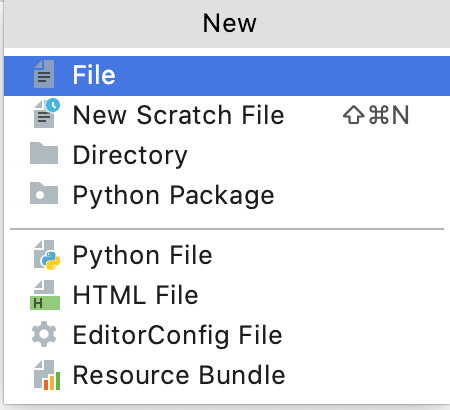

Нужно выбрать первый вариант. Важно: нам нужно сделать файл без расширения. 

В этот файл вставляем такую строку: `worker: python main.py`

Теперь создадим второй файл. Это сделать просто – откройте терминал в PyCharm опять и напишите `pip freeze > requirements.txt`. 

Возвращаемся в терминал. Надо ввести несколько команд:

1. `git init` – инициализирует гитхаб репозиторий
2. `heroku git:remote -a название_проекта` – создаст удаленный репозиторий и назовет приложение (если не работает, то создайте приложение вручную [тут](https://dashboard.heroku.com/apps) и вернитесь к этому шагу)
3. `git add .` – добавляет файлы
4. `git commit -am "make it better"` – делает коммит (можете менять подпись)
5. `git push heroku master` – отправляет коммит в репозиторий (после этого лучше подождать минутку-другую)
6. `heroku ps:scale worker=1` – запускает worker dyno (так heroku называет контейнеры, мы используем бесплатную версию, подробней [тут](https://www.heroku.com/dynos))

Все, победа! Бот должен заработать (иногда нужно подождать пару минут). 

В дальнейшем, если Вы будете менять код и дополнять функционал бота, Вам нужно будет делать только пункты 3-6 из списка выше, чтобы обновить бот.

Дашборды со всякой информацией по Вашему приложению можно смотреть тут: https://dashboard.heroku.com/apps

## Дополнительное чтение

Туториалов и уроков на тему ботов – тьма. В принципе можете брать любой на хабре (если любите читать) или ютубе (если любите смотреть). Но вот несколько, что кажутся полезными:

1. [Очень классный и большой набор уроков, телеграм боты от А до Я](https://mastergroosha.github.io/telegram-tutorial/)
2. [Как сделать бота с базой данных MySQL](https://www.youtube.com/playlist?list=PLvpsu6rFEzwUtzK6qf9wyDsAzM-sdtHTT)
3. [Бот, который присылает дешевые билеты в театр](https://habr.com/ru/post/445632/)
4. [Как деплоить с хероку – похоже на наш семинар, но есть пара неточностей](https://www.youtube.com/watch?v=B72-sZyiW10&lc=UgxmpAY651efoK6fGgd4AaABAg.9B7tj_dFDQq9B7vksC6WGf&ab_channel=%D0%92%D0%BB%D0%B0%D0%B4%D0%9D%D0%B5%D0%B2%D0%B5%D1%80%D0%BE%D0%B2)